<a href="https://colab.research.google.com/github/zhenyong25/EE0005_Classify_Cusine-/blob/main/EE0005_Classify_Cuisine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cooking Recipe**



###**Problem: Can we classify the type of cuisine based on the list of ingredients provided?**

# Data Acquisition

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb 
sb.set()
import random
import gc

###**Import Data and Clean Data**

We first look at the train dataset provided

The dataset given is in JSON format; hence we use the `read_json` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [ ]:
cookingdata_train = pd.read_json('train.json')
cookingdata_train.head()


ValueError: ignored

Description of dataset:

In the dataset, we include the
> **Recipe ID** : ID for each recipe   
> **Type of cuisine**: Type of cuisine for each recipe  
> **List of ingredients of each recipe**: Ingredients in each recipe  

---
Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [ ]:
print('Data type: ', type(cookingdata_train))
print('Data dim: ', cookingdata_train.shape)

Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [ ]:
cookingdata_train.dtypes

Check the details of dataset using the `info()` attribute 

In [ ]:
cookingdata_train.info()

---

Next we look at the test data set provided

In [ ]:
cookingdata_test = pd.read_json('test.json')
cookingdata_test.head()

In [ ]:
print('Data type: ', type(cookingdata_test))
print('Data dim: ', cookingdata_test.shape)

In [ ]:
cookingdata_test.dtypes

In [ ]:
ingredients = pd.DataFrame(cookingdata_test['ingredients'])
ingredients.head()


## Explore the dataset

We need to start by first summarizing the characteristics of the dataset visually

## Exploratory Data Analysis:

number of ingredients in each cuisine 
number of cuisines in dataset (distribution of cuisines)  
type of ingredients in each recipe  
all the different types of cuisines


#### Count the number of types of Cuisines in Dataset

We first want to find the number of types of cuisines provided in the dataset and the counts of each type of cuisine **given**

In [ ]:
print('Number of Types of Cuisines: ',len(cookingdata_train['cuisine'].unique()))

cuisinedata = pd.DataFrame(cookingdata_train['cuisine'])
cuisinedata['cuisine'].value_counts()

NameError: ignored

We plot a countplot to look at the counts of each cuisine in the dataset




NameError: ignored

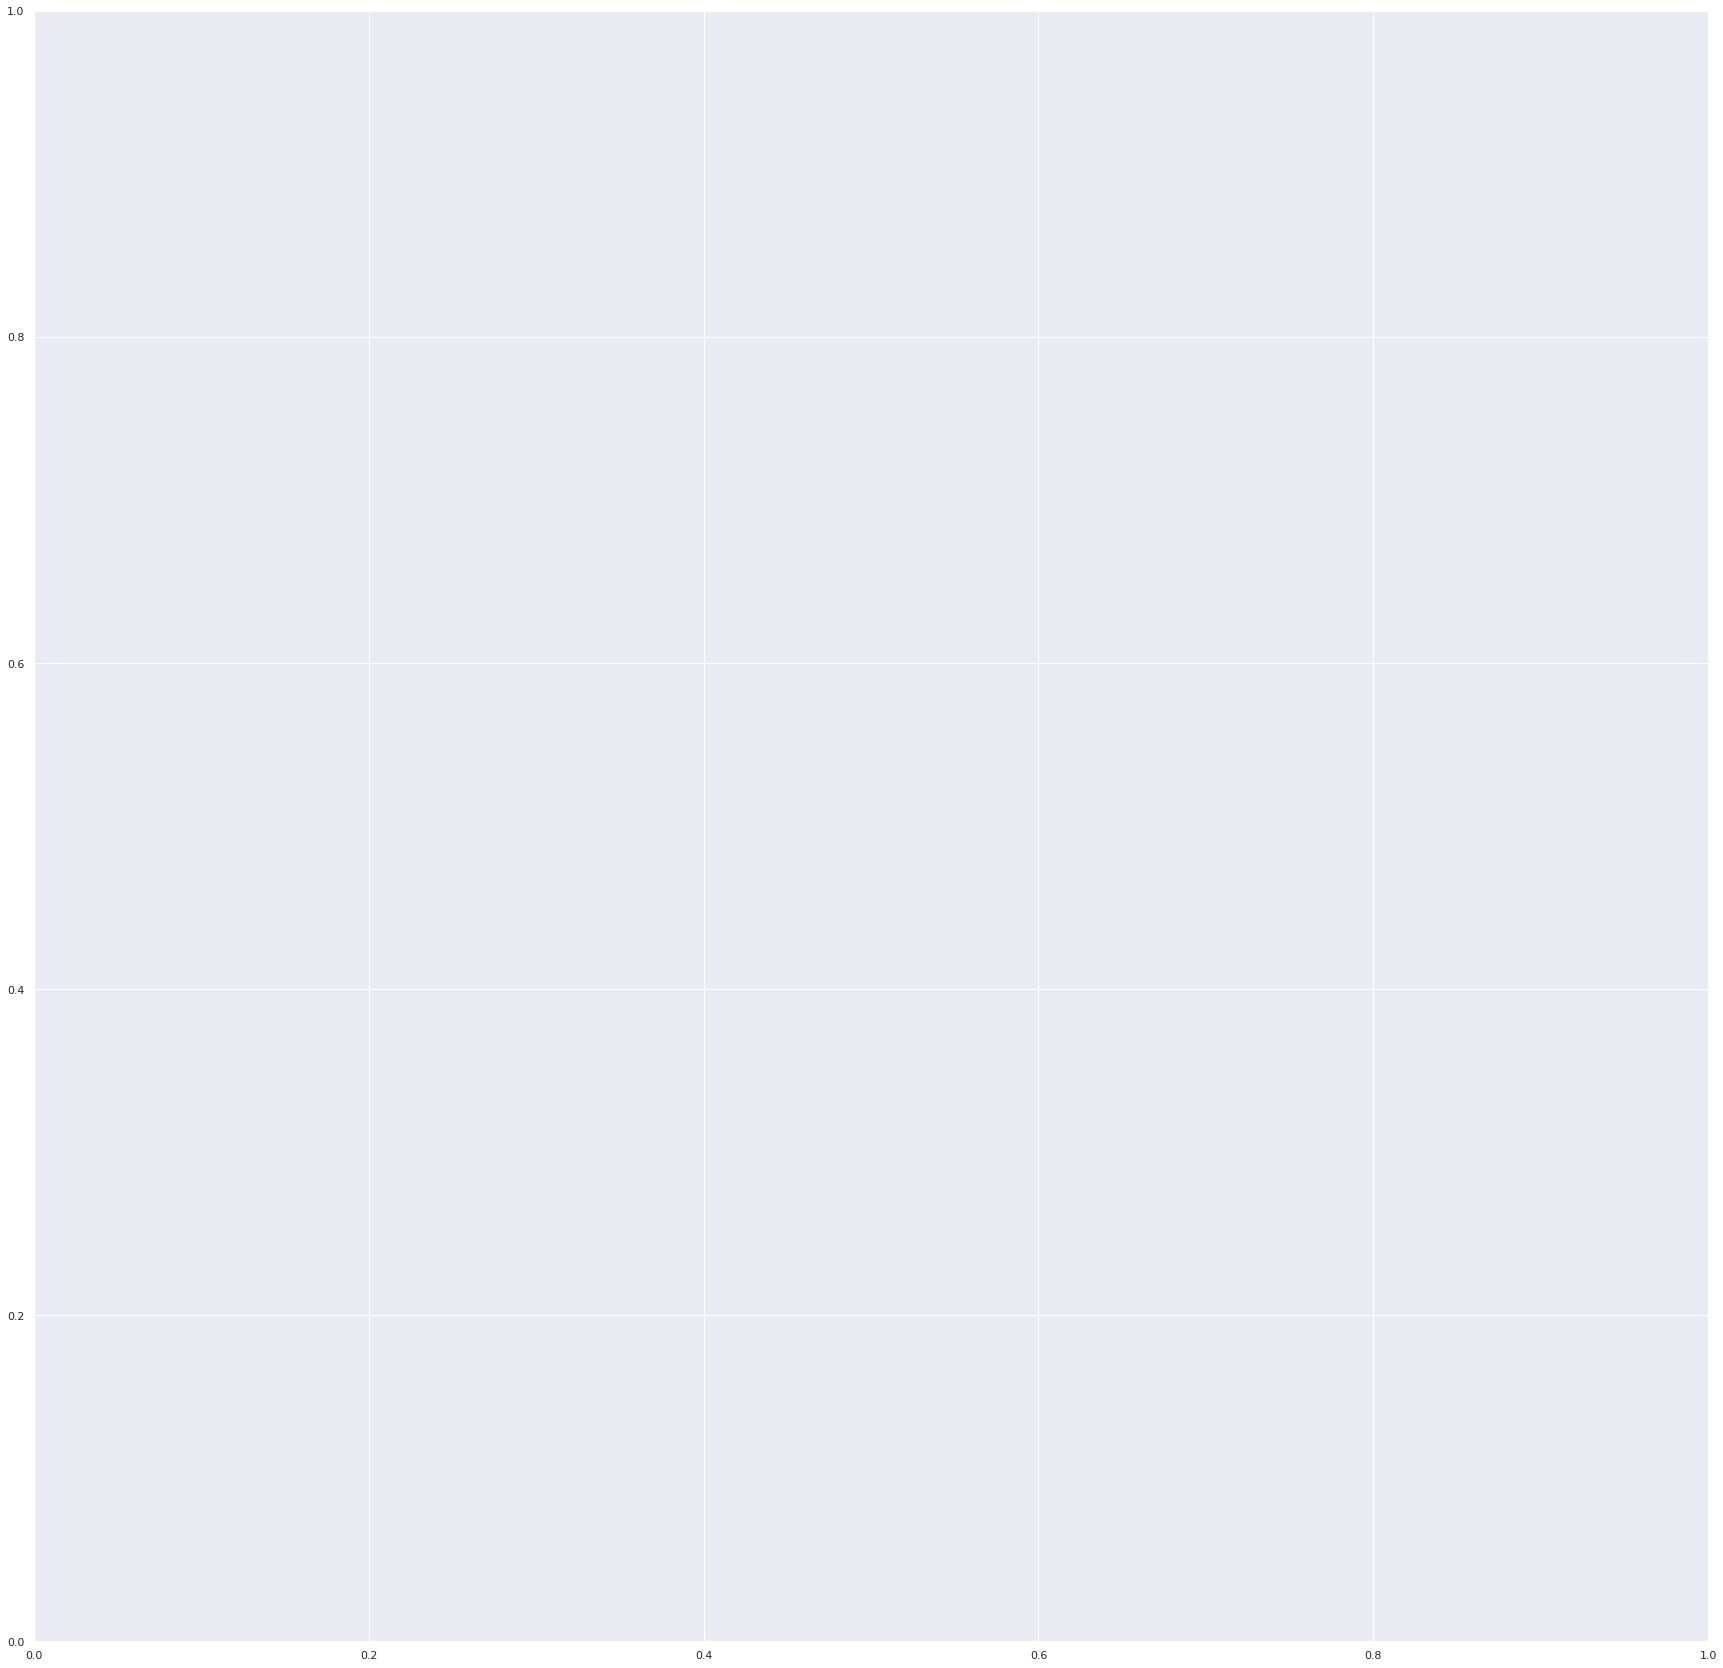

In [ ]:
f, axes = plt.subplots(1,1,figsize = (30,30))
sb.countplot(cuisinedata['cuisine'])

#### Number of Ingredients per cuisine meal  

Here we plot the number of ingredients per meal and frequency of each cuisine meal

In [ ]:
ingredientData = pd.DataFrame(cookingdata_train['ingredients'])
ingredientData

ingredientnumber = []

for i in range (0, 39774):
    ingredientnumber.append(len(ingredientData.iloc[i][0]))

ingredientnumber_df = pd.DataFrame(ingredientnumber, columns = ['Number of ingredients'])
ingredientnumber_df

cookingdata_train = pd.concat([cookingdata_train, ingredientnumber_df], axis = 1)
cookingdata_train.head()

We visualize the distribution of the number of ingredients and its frequency

In [ ]:
f, axes = plt.subplots(1,1, figsize = (20,20))
sb.distplot(cookingdata_train['Number of ingredients'], kde = False)

#### Average number of ingredients per cuisine  

Next, we want to find out the average number of ingredients per dish in each cuisine

In [ ]:
cuisineingredients = cookingdata_train['Number of ingredients'].groupby(cookingdata_train['cuisine'])
print(cuisineingredients.mean())

In [ ]:
cuisineingredients_df = pd.DataFrame(cuisineingredients.mean().round())
cuisineingredients_df

In [ ]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_axes([0, 0 ,1 ,1])
cuisines = ['brazillian', 'british', 'cajun_creole', 'chinese', 'filipino',
           'french', 'greek', 'indian', 'irish', 'italian', 'jamican', 'japanese',
           'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai',
           'vietnamese']

average = [10, 10, 13, 12,10,10,10,13,9,10,12,10,11,11,13,10,10,10,13,13]
ax.bar(cuisines, average)
plt.show()

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'Number of ingredients', y = "cuisine", data = cookingdata_train, orient = "h")

#### Count of Ingredients in Dataset

We now want a distribution of all the different kinds of ingredients and their counts

In [ ]:
ingredientData = pd.DataFrame(cookingdata_train['ingredients'])
ingredientData

Next we have to create a list of all the ingredients

We first make a dictionary of ingredients with their total used times in the dataset

In [ ]:
ingredientDict = {} #creating an empty dictionary
for i in range (0, 39774): #for loop to go throught all rows
    for ingredient in ingredientData.iloc[i][0]: #for loop to go through inner arrays of each row
        if ingredient not in ingredientDict.keys():  #if ingredient is not in dictionary, it will be the the first instance
            ingredientDict[ingredient] = 1
        else:
            ingredientDict[ingredient] += 1 #else if ingredient is already in dictionary, add another instance
ingredientDict


We then sort the dictionary in terms of ingredient with most count to ingredient with least count

In [ ]:
sorted_dict = {} #creating an empty dictionary
sorted_keys = sorted(ingredientDict, key=ingredientDict.get, reverse=True) # use ingredientDict, get keys from ingredientDict
                                                                           # we previously created, and list from most counts
                                                                           # to least counts, python sorted() function is used
                                                                           # to sort the dictionary
for r in sorted_keys:
    sorted_dict[r] = ingredientDict[r]

sorted_dict

Converting the sorted dictionary into a pandas dataframe

In [ ]:
ingredientsDF = pd.DataFrame(list(sorted_dict.items()),columns = ['ingredient','count']) # create pandas df through the sorted dict
pd.set_option("display.max_rows", None, "display.max_columns", None) #display all rows and columns
print(ingredientsDF)

In [ ]:
ingredient_list = []
for key in sorted_dict.keys():
    ingredient_list.append(key)

In [ ]:
ingredient_list

In [ ]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
df = pd.DataFrame(cookingdata_train)

# Split the Dataset into Train and Test
train_df, test_df = train_test_split(df, test_size = 0.25)

In [ ]:
ax=plt.subplot()
CuisineCall = list(range(0,len(train_df['cuisine'].value_counts().index)))
LABELS=train_df['cuisine'].value_counts().index
ax.bar(CuisineCall,train_df['cuisine'].value_counts(),width=0.5,color='b',align='center', label='train data')
ax.bar(CuisineCall,test_df['cuisine'].value_counts(),width=0.5,color='g',align='center',label='test data')
plt.xticks(CuisineCall, LABELS,rotation=85)
ax.autoscale(tight=True)
plt.legend()

plt.show()

In [ ]:
# Get the ingredients column from the new train data and create the list of all existing ingredients
raw_ingredients = list()
for recipt in train_df.iloc[:,2]:
    for ingredient in recipt:
        raw_ingredients.append(ingredient.strip())
        
raw_cuisines = list()
for recipt in train_df.iloc[:,1]:
    raw_cuisines.append(recipt.strip())
    
ingredients=list(set(raw_ingredients)) #remove duplicates
print("Numbers of Unique Ingredients: ", len(ingredients))

In [ ]:
for ing in ingredients:
    vector=[]
    # loop for train data
    for recipe in train_df.ingredients: 
        if ing in recipe:
            vector.append(1)
        else:
            vector.append(0)
    train_df[ing]=pd.Series(vector,index=train_df.index) # Adds column containing 0 and 1's for this ingredient
    
    # loop for test data
    vector=[]
    for recipe in test_df.ingredients:
        if ing in recipe:
            vector.append(1)
        else:
            vector.append(0)
    test_df[ing]=pd.Series(vector,index=test_df.index) # Adds column containing 0 and 1's for this ingredient

##Preparing The Dataset 
removing unnecessary columns 

In [ ]:

train_df=train_df.drop('ingredients',1)
train_df=train_df.drop('id',1)

test_df=test_df.drop('ingredients',1)
test_df=test_df.drop('id',1)

train_df.head()

In [ ]:
# Creating train & test set
X_train=train_df.drop('cuisine',axis=1)
Y_train=train_df['cuisine']
X_test=test_df.drop('cuisine',axis=1)
Y_test=test_df['cuisine']

In [ ]:
from sklearn import metrics

forest=RFC(n_estimators=10,max_features=10)
forest.fit(X_train,Y_train)
output=forest.predict(X_test)
print("Accuracy of the model: ", metrics.accuracy_score(Y_test, output))

In [ ]:
#Optimize the number of estimators for a given number of maximum features
opt_table_estimators=list()
n_features=5
n_estimators=50
for i in range(1,n_estimators):
    forest=RFC(n_estimators=i,max_features=n_features)
    forest.fit(X_train,Y_train)
    output=forest.predict(X_test)
    opt_table_estimators.append(metrics.accuracy_score(Y_test, output))
plt.plot(range(1,n_estimators), opt_table_estimators)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

In [ ]:
# Number of features
opt_table_n_features=list()
n_estimators=5
n_features=50
for i in range(1,n_features):
    forest=RFC(n_estimators=i,max_features=n_features)
    forest.fit(X_train,Y_train)
    output=forest.predict(X_test)
    opt_table_n_features.append(metrics.accuracy_score(Y_test, output))
plt.plot(range(1,n_features), opt_table_n_features)
plt.xlabel('Number of features')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of features (5 trees)')
plt.show()

In [ ]:
forest=RFC(n_estimators=40,max_features=10)
forest.fit(X_train,Y_train)
output=forest.predict(X_test)
print("Accucary of the model: ",metrics.accuracy_score(Y_test, output))

In [ ]:
#Results
Output=pd.DataFrame(test_df.iloc[:,0])
Output['Prediction']=pd.Series(output,index=test_df.index)
Output.head(20)

In [ ]:
importance = forest.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_plot=importance.sort_values('Importance',ascending=False ).loc[importance['Importance']>0.004,:]
x = np.arange(len(importance_plot.index.values))
y = importance_plot.iloc[:, 0]
plt.bar(x, y,align='center')
plt.xticks(x,importance_plot.index.values,rotation=85)
plt.ylabel('Importance')
plt.title('Main ingredients importance')
plt.autoscale(tight=True)
plt.show()

#### Conclusion

`Olive oil` and `Salt` are the most important ingredients while predicting cuisine.